# Part I - (Communicate Data Findings: Ford Go-Bike Project)
## by (Olowe Joseph)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset consists of information regarding 183,412 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, gender, and some additional variables.

## Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Looad data into juypter notebook as df
df = pd.read_csv('201902-fordgobike-tripdata1.csv')


In [3]:
#View the first 5 rows of df
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#view the shape of df dataframe
df.shape

(183412, 16)

In [5]:
#views datatypes of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#convirm the total number of missing values.
sum(df.isnull().sum())

17318

In [7]:
#drop rows with missing values
df.dropna(inplace=True, axis=0)

In [8]:
#convert start_station_id,end_station_id and bike_id of df as strings
df.start_station_id=df.start_station_id.astype(str)
df.end_station_id =df.end_station_id.astype(str)
df.bike_id =df.bike_id.astype(str)

#convert the  start time, end time columns into datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#convert the time for start and end-times start and end_day.
df['start_day'] = df['start_time'].dt.day_name()
df['end_day'] = df['end_time'].dt.day_name()

#making days of the weeks inorder.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['start_day'] = pd.Categorical(df['start_day'], categories=days, ordered=True)
df = df.sort_values('start_day')


# convert durations_sec into hours.
df['duration_hours'] = df['duration_sec'] /3600

#convert start and end_time into month for df dataframe
df['start_month'] = df['start_time'].dt.month_name()
df['end_month'] = df['end_time'].dt.month_name()

#view the values count for the member_birth_year.
df['member_birth_year'].value_counts()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
          ...  
1878.0        1
1910.0        1
1927.0        1
1930.0        1
1928.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [9]:
#1878 is not realistic, replace 1878 by 1978
df.replace(1878, 1978, inplace=True)

In [10]:
# creating new column of age participants.
df['Age']=(2019-df.member_birth_year)

In [11]:
#convert start_time into start_hour
df['start_time_hour']=df['start_time'].dt.hour

In [12]:
#see if the Age column has been created.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 82681 to 173826
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type   

In [13]:
df.shape

(174952, 23)

In [14]:
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### What is the structure of your dataset?

> The dataset includes 183,412 trips with 16 features
> The time in this dataset have object data types which are strings, We would have to convert it to datetime format.
> After preliminarly wranling, the rows and fatures become 174952 and 23 respectively.
### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out when and where most of the trips are taken as the dataset already includes start time and start station(which we can call the location), and end time with end station also. Also, I am interested in the age, sex, and user_type of the riders and the duration of the trips in these time points and locations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. Time: Morning and afternoon(time of the day) will have more trips than night as riders would prefer to ride when there is natural light and the day is clear.

> 2. Age: I believe younger riders will be much more than older riders because of their strength and maybe physical abilities.

> 3. Pricing: Although we do not know the cost of bikes, i believe that subscribers will be more than customers due to cost(if pricing is somewhat high). 

> 4. Gender: I'm trying to believe that we would have more male riders than female riders as we know cycling is very tedious and men are stronger biologically.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [15]:
#The functions which will be  applied to all plots in labelling axes and title.
def m_n_p(Mlab, Nlab, title):
    plt.title(title)
    plt.xlabel(Mlab)
    plt.ylabel(Nlab)

**Let's look at the day of the week with the most rides.**

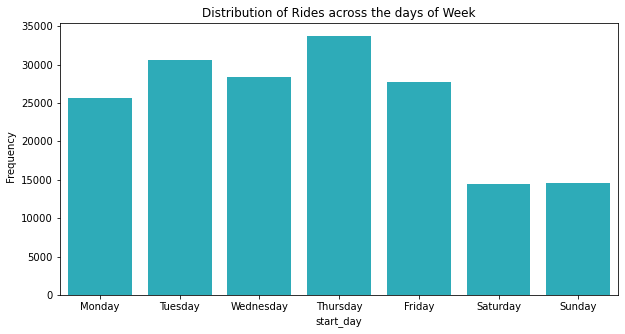

In [16]:
#The countplot of the distribution of start day in a week.
plt.figure(figsize=(10,5 ))
col = sb.color_palette()[-1]
sb.countplot(df['start_day'], color = col);
m_n_p('start_day',' Frequency', 'Distribution of Rides across the days of Week')
plt.show();

We have more bike riders on thursdays, which means that there are more bike riders on weekdays than on weekends as we can see how close other weekdays are to thursday.

**Let us take a look at the start_time_hour data**

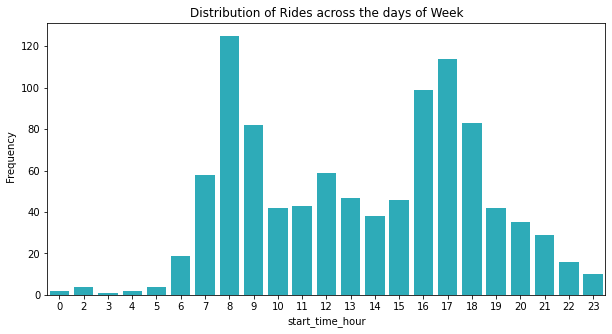

In [38]:
#The countplot for the distribution of start_time_hour
col = sb.color_palette()[-1]
plt.figure(figsize=(10,5 ))
sb.countplot(df['start_time_hour'], color = col)
m_n_p('start_time_hour',' Frequency', 'Distribution of Rides across the days of Week')
plt.show();

 Here we can see the order of the highest peak time to the lowest.

We have more riders in the evening 17h which is 5pm and this is only logical as people would have closed from their place of work. Also close to it is 8am in the morning, people go for early morning jogs so maybe some ride their bikes as a way to excercise or as a medium for transport to their place of work.


**Let us focus on the duration now for our next plot**

plotting the duration_min data on a normal scale

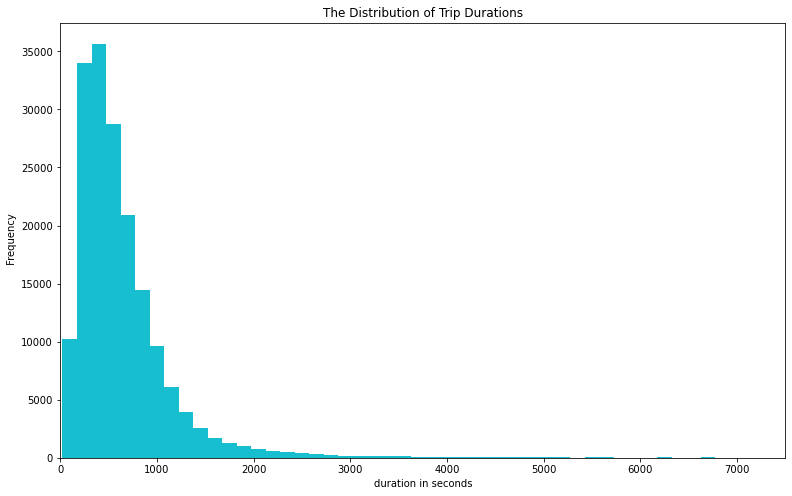

In [18]:
#Histogram for the distribution of duration_sec
bin= np.arange(25, df['duration_sec'].max()+200, 150)
plt.figure(figsize=(13, 8))
plt.hist(df['duration_sec'], bins=bin, color = col)
plt.xlim(0, 7500)
m_n_p('duration in seconds',' Frequency', 'The Distribution of Trip Durations')
plt.show()

 The plot has a long tail of the distribution

 Due to this long tail of the distribution, we would opt for  the log scale to visulaize the duration_sec.

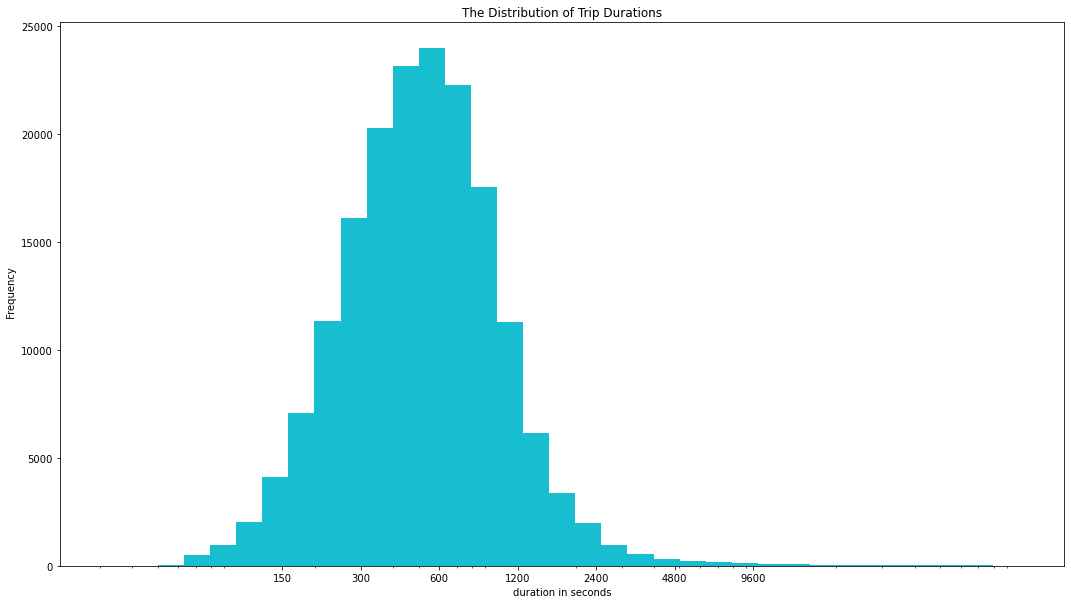

In [19]:
#Histogram after transforming the duration_seconds by logarithmns.
plt.figure(figsize=(18, 10))
bins = 10**np.arange(1.5,  5+0.1 , 0.1)
plt.hist(df['duration_sec'], bins = bins, color = col);
plt.xscale('log');
plt.xticks([150, 300, 600, 1200, 2400, 4800, 9600],[150, 300, 600, 1200, 2400, 4800, 9600])
m_n_p('duration in seconds',' Frequency', 'The Distribution of Trip Durations');
plt.show()


 The distribtion looks  normal but we can make it better by removing the long tail.

**Looking at the age of Bikers**

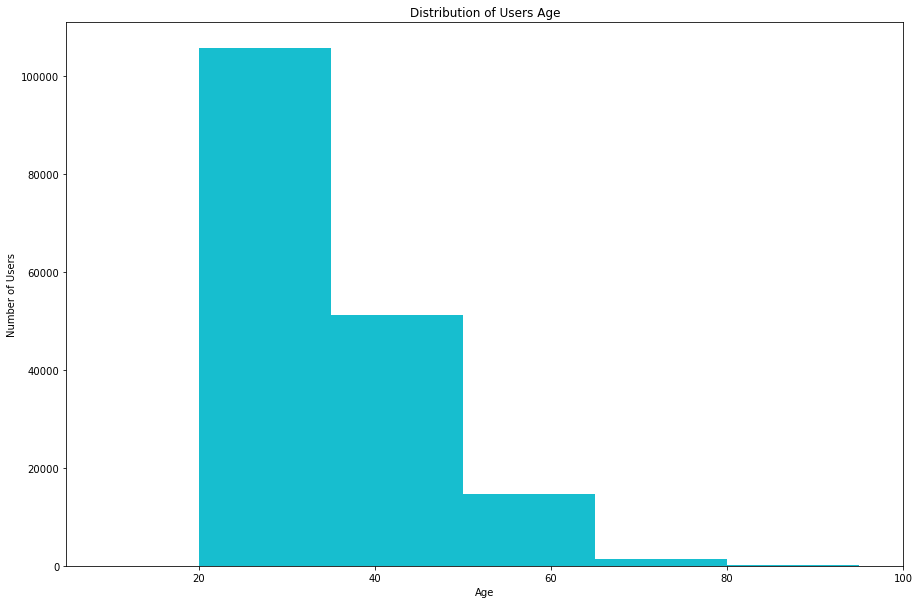

In [20]:
#histogram of the disribution of age of the participants
bin = np.arange(20,135+15, 15 )
plt.figure(figsize=(15, 10))
plt.hist(df['Age'], bins=bin, color = col)
plt.xlim(5,100)
m_n_p('Age', 'Number of Users', 'Distribution of Users Age')
plt.show()

From this distribution, we can conclude that the major age range of bikers are 25-35 and 80 as a cut point.

**The distribution of participants' age after transformed by logarithmn**

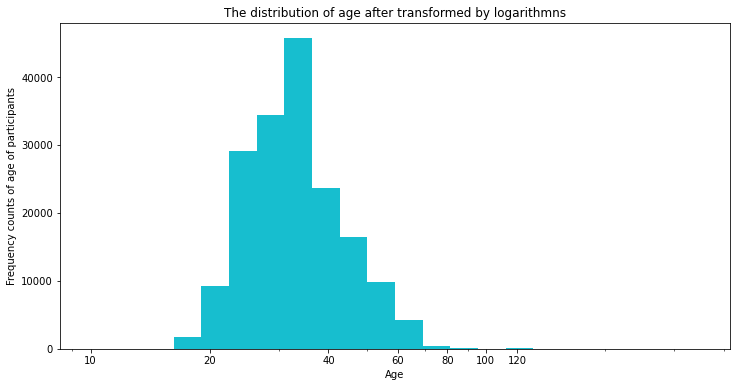

In [21]:
#Histogram of age transformation in logarithmn
bin = 10**np.arange(1,2.5+0.07, 0.07 )
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=bin, color=col)
ticks=[10,20 , 40, 60, 80, 100,120]
labels = ['{}'.format(m) for m in ticks]
plt.xscale('log')
plt.xticks(ticks,labels)
m_n_p('Age', 'Frequency counts of age of participants', 'The distribution of age after transformed by logarithmns')
plt.show()

**Looking at the Bikers Gender**

plotting the Bikers genders 

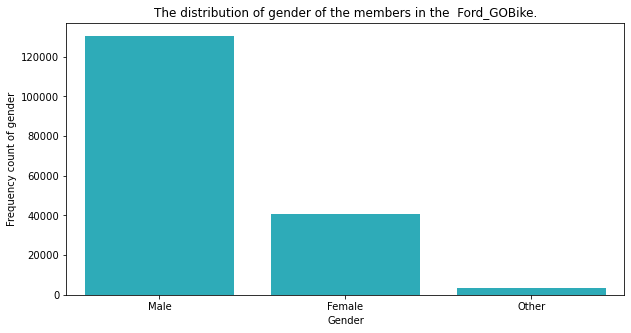

In [22]:
#The bar graph of the disribution of Gender
col = sb.color_palette()[-1]
plt.figure(figsize = [10, 5]) 
sb.countplot(data=df, x='member_gender',color=col)
m_n_p('Gender','Frequency count of gender','The distribution of gender of the members in the  Ford_GOBike.')
plt.show()

 We can also plot a pie chart of the gender

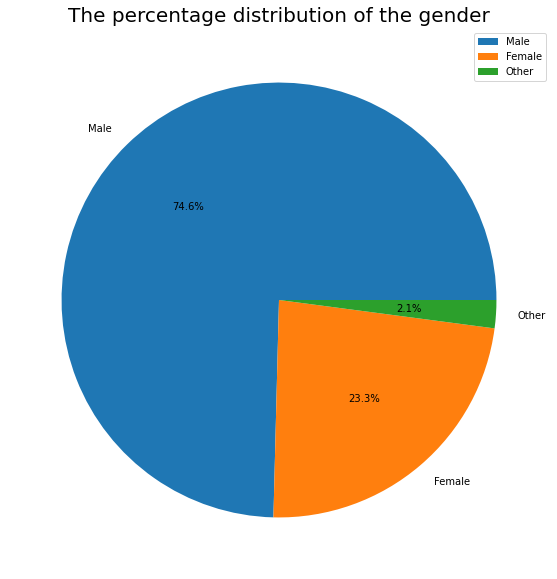

In [23]:
#The percentage of gender of the participants.
((df.member_gender.value_counts()/df.member_gender.count())*100).plot.pie(figsize=(15,10),autopct='%2.1f%%')
plt.title('The percentage distribution of the gender', {'fontsize':20})
plt.ylabel('')
plt.legend()
plt.show();

We can conclude that we have more male bikers. they make up if not more that 2X the female bikers

**Looking at the User type**

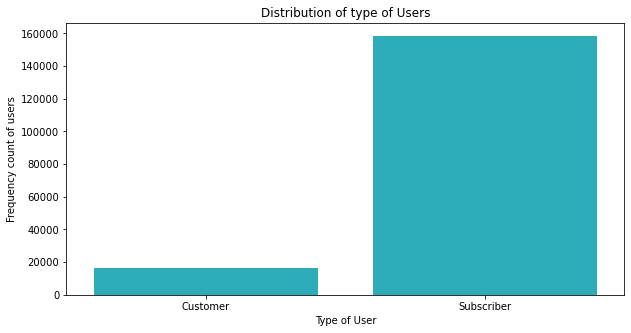

In [24]:
#The distribution of User Type.
plt.figure(figsize = [10, 5]) 
sb.countplot(data=df, x='user_type',color=col)
m_n_p('Type of User','Frequency count of users','Distribution of type of Users')

from the plot, we can see that the subscriber users are like 9X more than the customer users, this might be as a result of good customer relationship and maybe price.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. The variable of interest for me was the trip duration. We can conclude that the users used the bike for a wider range of trip duration. After cleaning the trip duration data and removing the outliers, we can see that the major trips had a trip duration on average of 420-720 seconds.

2. We can see that the work days were the most days that the users use the bike share system the most, especially on Thursdays.

3. We can see that the time most users ride the bike were around 8 A.M and 5 P.M and this looks more like the starting and closing time for companies. As for the users, we can see  that the male users are almost 3 times the female users, the most age range is 25-35 and the subscriber users are almost 9-10 times the customer users.
4. In the competition, we have more male participants (74.6%) than female participants(23.3%). 
5. The subscriber users are like 9X more than the customer user

4. The duration_min data did not show a proper distribution while plotting them on the linear scale, that's why I have plot them on the logarithmic scale to have the proper distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. I calculated the age of the users using the member_birth_year. i assumed the name of the csv file which is '201902' to be 2019 february as 02 means the second month of the year. so i used 2019 in calculating the members age.

2. The tripping duration was initially at seconds but I converted them to minutes for easier analysis, also the duration_min distribution had outliers so I removed them.

3. I extracted the hour of the day and the day of the week from the timestamp.



The above was done in other to save the cleaned dataset

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**The association between duration time (sec) and type of user**

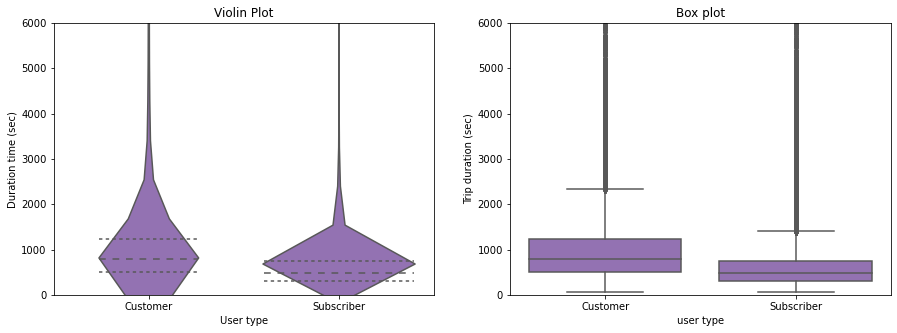

In [25]:
#ploting the violin and box plot to show the relationship between duration time (sec) and type of user.
color=sb.color_palette()[4]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.violinplot(df['user_type'], df['duration_sec'], color=color, inner='quartile')
m_n_p('User type', 'Duration time (sec)', 'Violin Plot')
plt.ylim(0, 6000)

plt.subplot(1,2,2)
sb.boxplot(df['user_type'], df['duration_sec'], color=color)
m_n_p('user type', 'Trip duration (sec)', 'Box plot') 
plt.ylim(0, 6000)
plt.show()

According to the violin and box plots, there is a slightly relationship between type of user and duration time in second. However, the customer use more time than subscriber to finsihed the trips.

**The relationship between type of user and gender of participants**

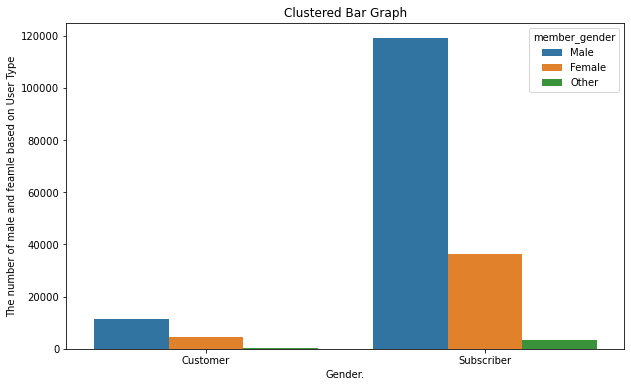

In [26]:
#The cluster bar graphs for the relationship between type of user and gender of participant.
plt.figure(figsize=(10,6))
sb.countplot(data=df, x ='user_type', hue='member_gender')
m_n_p('Gender.', 'The number of male and feamle based on User Type', 'Clustered Bar Graph')
plt.show()

From the cluster bar graph, male participants have a higher relationship with type of user than female participants.

Now lets plot a scatter plot of **duration_sec vs. Age, with log transform on duration_min axis.**

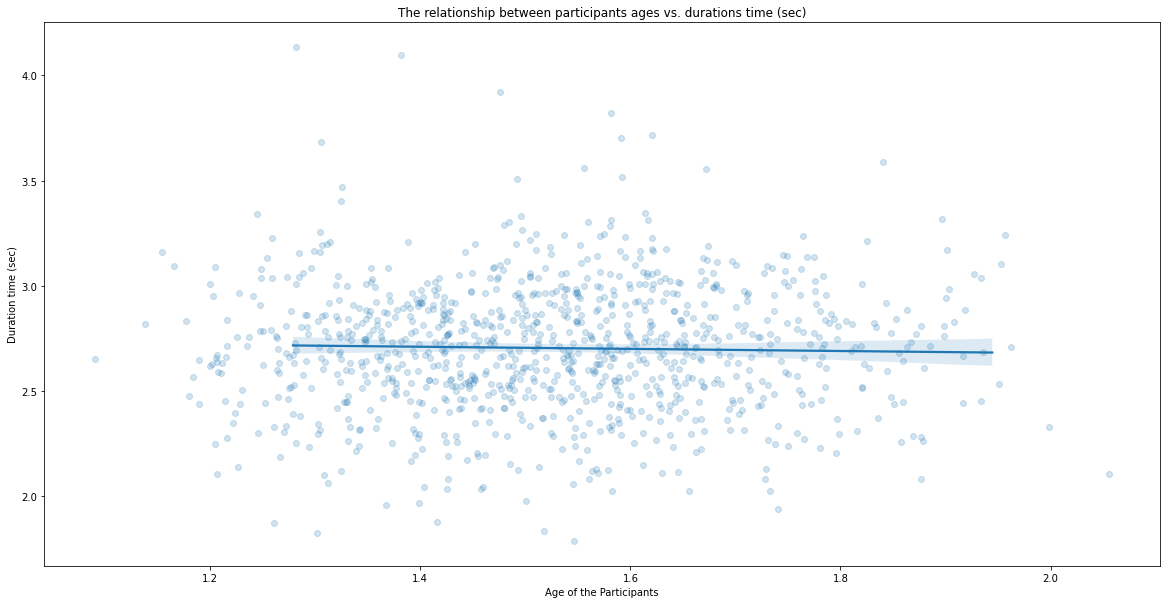

In [27]:
#The scatterplot for the relationship between duration_sec and Age.
plt.figure(figsize=(20,10))
df=df.sample(1000, replace=False)
def log(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
sb.regplot(df['Age'].apply(log), df['duration_sec'].apply(log),  scatter_kws={'alpha':1/5}, x_jitter=0.2)
m_n_p('Age of the Participants', 'Duration time (sec)', 'The relationship between participants ages vs. durations time (sec)')
plt.show()

From the scatter diagram, there is a moderate linear relationship between duration time (seconds) and age of the participants.

**The relationship of duration time in seconds vs. bike_share_for_all_trip**

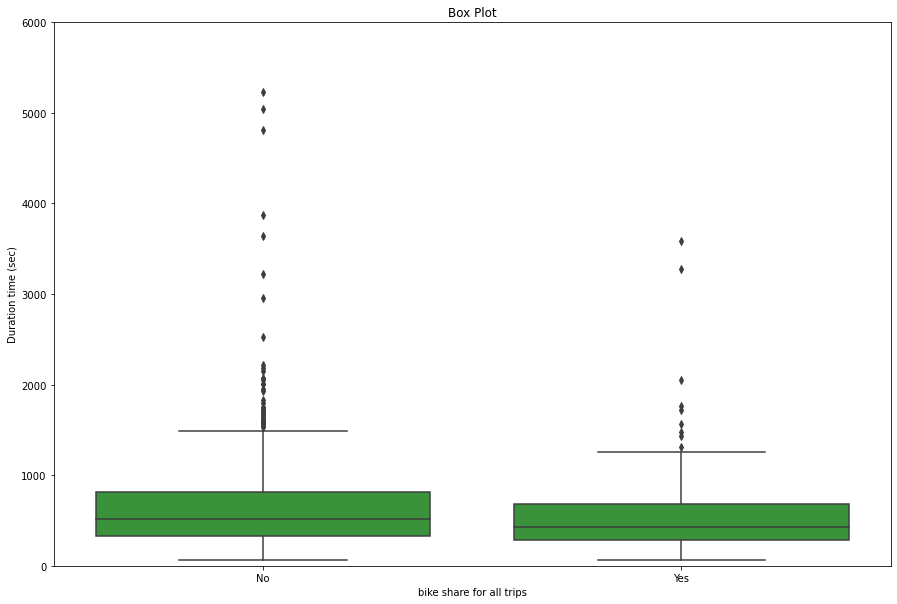

In [34]:
#The  relationship between duration seconds in time and bike_share_for_all_trib using Boxplot.
col=sb.color_palette()[-8]
plt.figure(figsize=(15,10))
sb.boxplot(data=df, x ='bike_share_for_all_trip', y='duration_sec', color=col)
m_n_p('bike share for all trips', 'Duration time (sec)', 'Box Plot')
plt.ylim(0, 6000)
plt.show()

From the boxplot, there is no signficant differece between the participants who share bike for all trips and those who dont share the bile for all trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- As said earlier, the main focus of interest of this dataset for me is the trip timing, I have studied the trip duration with the member age, and also I have studied the rush hour usage across the day for both user types(the subscriber and the customer).
- There is a moderate linear relationship between duration time (seconds) and age of the participants
- Male participants have a higher relationship with type of user than female participants.
- There is a slightly relationship between type of user and duration time in second. However, the customer use more time than subscriber to finsihed the trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 Yes, I have observed interesting relationships, for the duration_sec vs the member age, I have concluded that from age 20 to 40, the duration of major trips was ranging between 120 sec  to 1800 sec and the trip duration range is decreasing as the age increased. This has been described with the duration_min vs age on the log scale as it appears like a horizontal cone which tends to decrease as the age of the member increased.

For the rush hour of the of the day vs the user type, I have found that the rush hours for both user types are 5 P.M and 8 A.M and those two rush hours are matching with the rush hours of the whole dataset which was investigated at the univariate visualization earlier but obviously the number of trips for subscriber users at those two hours are larger than the same two hours for the customer users.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**The relationship between age and duration time influenced by user type**

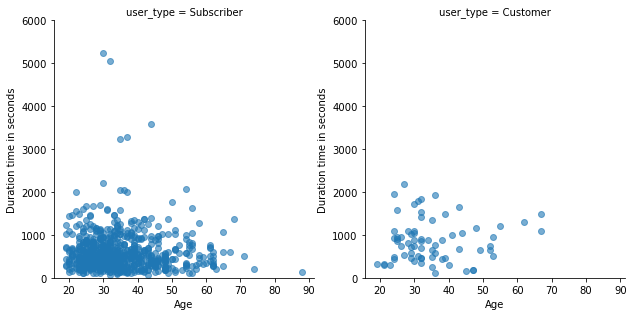

In [29]:
#Obtaining a sample size of 800 observation from df dataframe.
df_sample=df.sample(n=800, replace = False)
#scatter diagram for the relationship between age and duration time influenced by user type
figure = sb.FacetGrid(data = df_sample, col = 'user_type', col_wrap=2, size = 4.5, sharey=False)
figure.map(plt.scatter, 'Age', 'duration_sec', alpha =0.6)
figure.set(ylim=(0, 6000))
figure.set(ylabel='Duration time in seconds')
figure.set(xlabel='Age')
plt.show();

Based on the two scattterplot, there is a weak relationship between age of the participants and duration time (seconds) in subscriber for bike trip. However, there is a strong positive between member age and duration time in customer for customer.

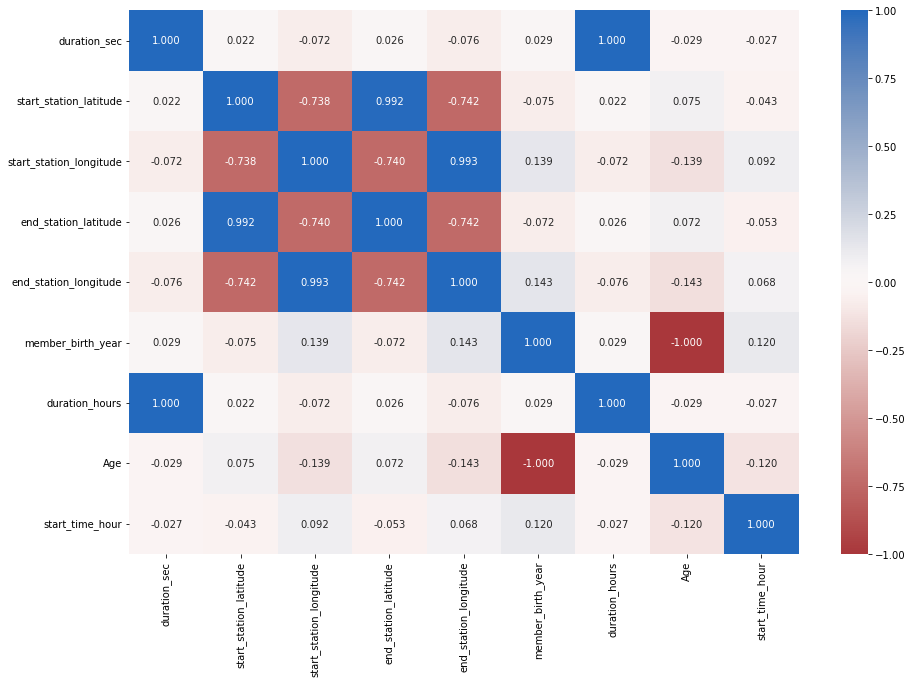

In [30]:
#The correlation of heatmap of df data for numerics features.
plt.figure(figsize = [15, 10])
sb.heatmap(data=df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

From the heatmap plot, there is a strong positive correlation between start_station_latitude and end end_station_latitude. Also, there is a strong positive relationship between start_station_longitude and end_station_longitude. Howerver, there is a strong negative correlation between start_station_longitude and  end_station_latitude. Also, there is a strong negative correlatin between start_station_latitude and end_station_longitude.

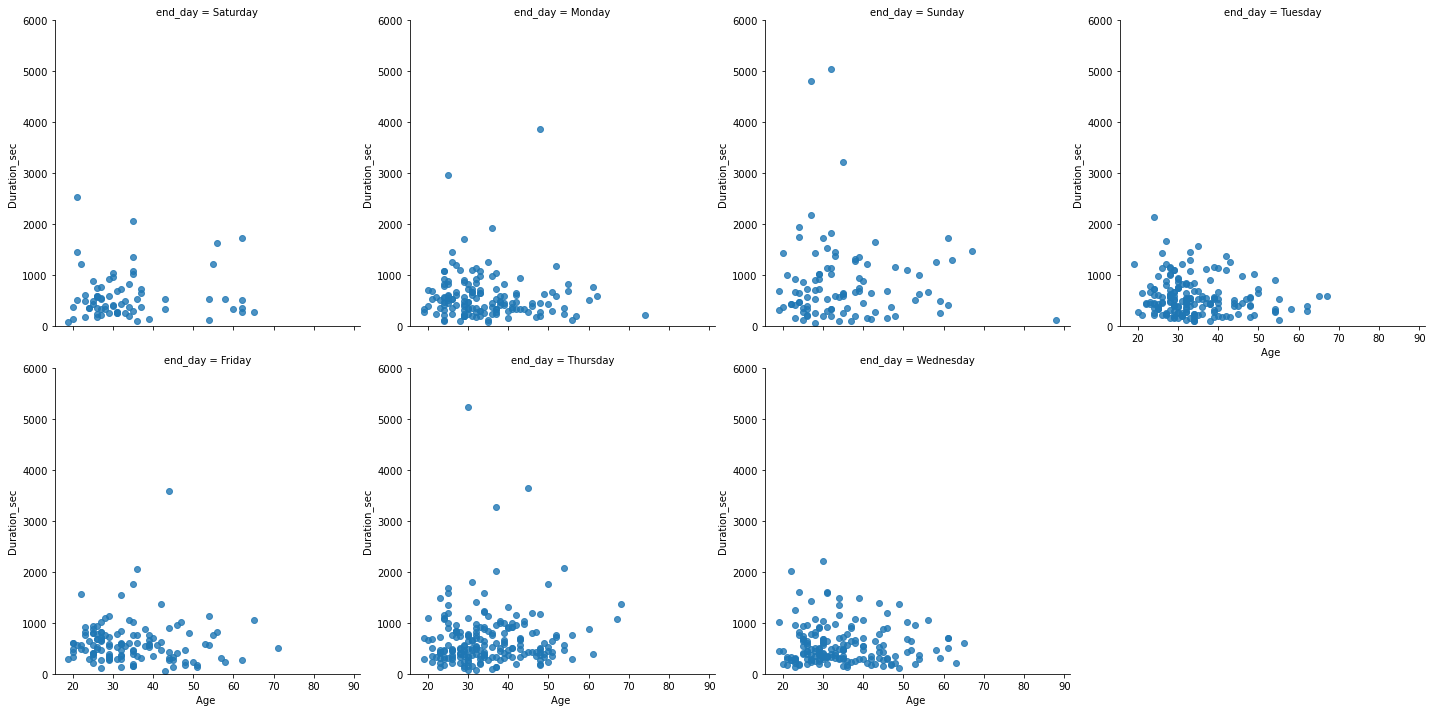

In [37]:
#sample size of 800 from df dataframe
df_sample=df.sample(n=800, replace = False)
#scatter diagram of Age vs duration time by end day
figure= sb.FacetGrid(data = df, col = 'end_day', size = 5, col_wrap=4, sharey=False)
figure.map(plt.scatter, 'Age', 'duration_sec', alpha =0.8)
figure.set(ylim=(0, 6000))
figure.set(ylabel='Duration_sec')
figure.set(xlabel='Age ')
plt.show()

Among the seven plots of scatterplot for the relationship between age and duration time in end_day, there is a strong positive relationship between age of the participants and duration second on Sunday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- This investigation has shown that the subscriber users have a higher age range than the customers users.
- There is a strong relationship between age and duration time in second on Sunday for end_day
- There is a strong positive relationship between start_station_longitude and end_station_longitude
- There is a strong negative correlation between start_station_longitude and end_station_latitude.
- There is a strong negative correlatin between start_station_latitude and end_station_longitude
- There is a strong positive between member age and duration time in customer for customer.


### Were there any interesting or surprising interactions between features?

 The interesting results shown by the plot is that the subscriber users are using the bikeshare system for longer duration and also covering a higher age range, which might be as a result of good customer service and customer relationship between the company and the subscribers.

## Conclusions

The dataset consist of 183412 rows and 16 columns. while wrangling, i discovered a few thing that needs to be fixed like wrong data types, and some modifications that could be made to make my analysis easier. The time in this dataset have object data types which are strings, i first converted them  to datetime format, then i pointed out my interests, which were finding out when and where most of the trips are taken as the dataset already includes start time and start station(which we can call the location), and end time with end station and also in the age, sex, and user_type of the riders and the duration of the trips in these time points and locations.

I was able to draw some new insights and come to a new conclusion after cleaning this dataset, We could see that the users used the bike for a wider range of trip duration, also, after cleaning the trip duration data and removing the outliers, we could see that the major trips had a trip duration on average of 420-720 seconds. We can also see that the work days were the most days that the users use the bike share system the most, especially on Thursdays. We can see that the time most users ride the bike were around 8 A.M and 5 P.M and this looks more like the starting and closing time for companies. As for the users, we can see that the male users are almost 3 times the female users, the most age range is 25-35 and the subscriber users are almost 9-10 times the customer users.

I also made some decisions so as to make my analysis easier, the duration_secs data did not show a proper distribution while plotting them on the linear scale so i plot them on the logarithmic scale to have the proper distribution, I calculated the age of the users using the member_birth_year, i assumed the name of the csv file which is '201902' to be 2019 february as 02 means the second month of the year so i used 2019 in calculating the members age, the tripping duration was initially at seconds but I converted them to minutes for easier analysis, also the duration_seconds distribution had outliers so I removed them and finally,
I extracted the hour of the day and the day of the week from the timestamp.

i focused the trip timing, I studied the trip duration with the member age, and also studied the rush hour usage across the day for both user types(the subscriber and the customer). I observed interesting relationships, for the duration_min vs the member age, I have concluded that from age 20 to 40, the duration of major trips was ranging between 120 seconds to 1800 seconds and the trip duration range is decreasing as the age increased. This has been described with the duration_min vs age on the log scale as it appears like a horizontal cone which tends to decrease as the age of the member increased.

For the rush hour of the of the day vs the user type, I found that the rush hours for both user types are 5 P.M and 8 A.M and those two rush hours are matching with the rush hours of the whole dataset which was investigated at the univariate visualization earlier but obviously the number of trips for subscriber users at those two hours are larger than same two hours for the customer users.